<a href="https://colab.research.google.com/github/syahriezaa/COV-RUN/blob/master/glcm.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!wget https://www.ugm.ac.id/galleries/crop/1230--730x420px.jpg

--2022-02-12 01:35:50--  https://www.ugm.ac.id/galleries/crop/1230--730x420px.jpg
Resolving www.ugm.ac.id (www.ugm.ac.id)... 175.111.88.3, 2001:df0:a7:301::2
Connecting to www.ugm.ac.id (www.ugm.ac.id)|175.111.88.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 92760 (91K) [image/jpeg]
Saving to: ‘1230--730x420px.jpg’

1230--730x420px.jpg 100%[===================>]  90.59K   211KB/s    in 0.4s    

2022-02-12 01:35:52 (211 KB/s) - ‘1230--730x420px.jpg’ saved [92760/92760]



jumlah titik terdeteksi =  667


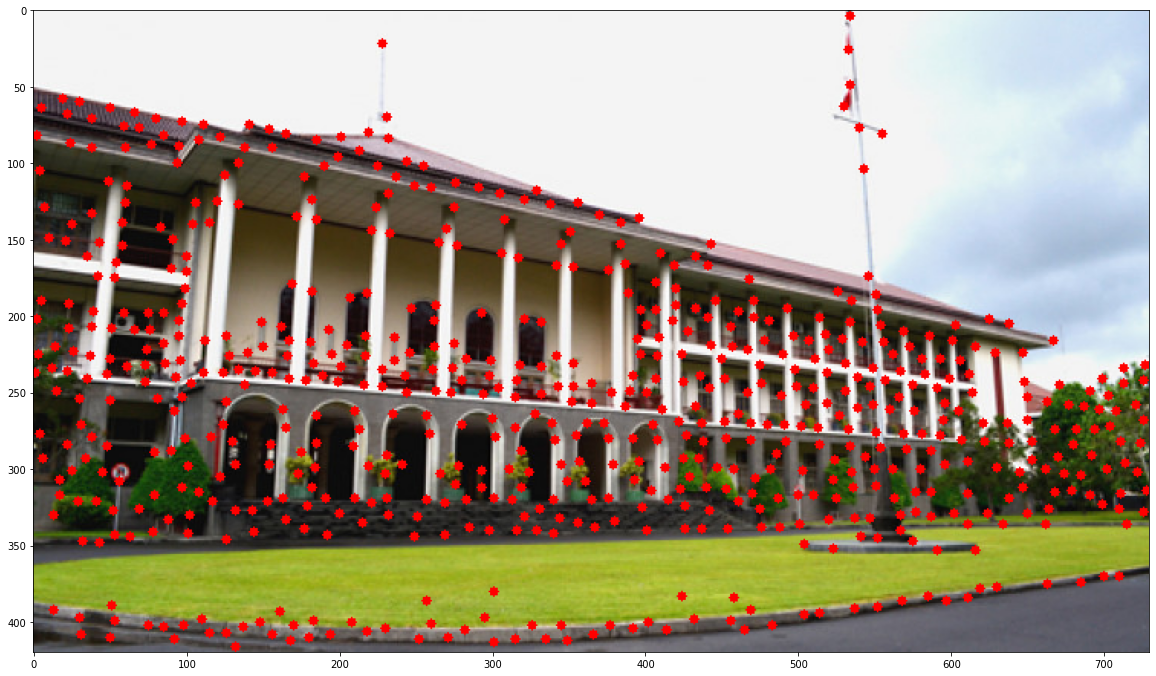

(<matplotlib.image.AxesImage at 0x7f2743179990>, None)

In [ ]:
import numpy as np
import cv2
from  matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow


img = cv2.imread("1230--730x420px.jpg")
gray=cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray,1000,0.01,10)
corners = np.int0(corners)

print("jumlah titik terdeteksi = ", corners.shape[0])
rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.rcParams["figure.figsize"]=(20,20)

for i in corners :
  x,y =i.ravel()
  cv2.circle(rgb,(x,y),3,255,-1)
plt.imshow(rgb),plt.show()

jumlah titik terdeteksi =  2299


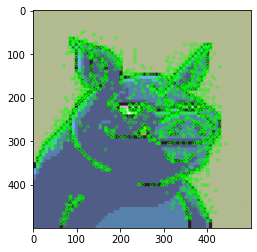

(<matplotlib.image.AxesImage at 0x7efd2ca79590>, None)

In [ ]:
import numpy as np
import cv2
from  matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
image = cv2.imread("/content/attachment_130915581.jfif")
gray=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

kaze = cv2.KAZE_create(False,False,0.001,5,10)
kp= kaze.detect(gray)

kp,dsc=kaze.compute(gray,kp)

print("jumlah titik terdeteksi = ", len(kp))

img_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
img2=cv2.drawKeypoints(img_rgb,kp,None,color=(0,255,0),flags=0)
plt.imshow(img2), plt.show()

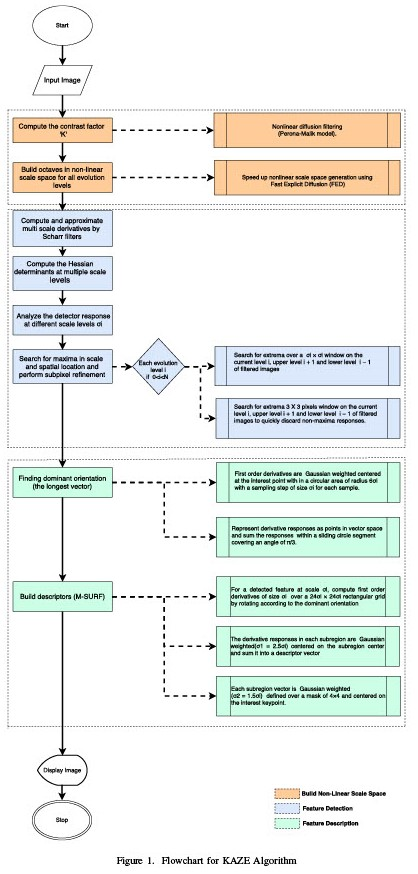

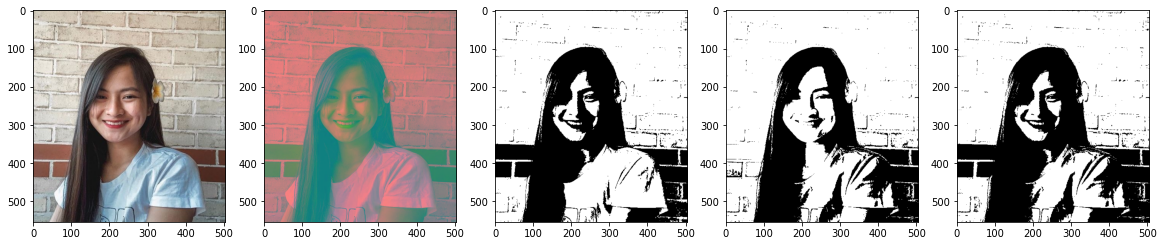

In [ ]:
import numpy as np
import cv2
from matplotlib import  pyplot as plt
from google.colab.patches import cv2_imshow

img=cv2.imread('/content/53405-reemar-martin-instagramatrreemar.jpg')
img_rgb=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_lab=cv2.cvtColor(img,cv2.COLOR_RGB2LAB)

l,a,b=cv2.split(img)
l=img[...,0]
a=img[...,1]
b=img[...,2]

ret,thresh1=cv2.threshold(a,127,255,cv2.THRESH_BINARY)
ret,thresh2=cv2.threshold(b,127,255,cv2.THRESH_BINARY)

thresh3=thresh1*thresh2

fig = plt.figure(figsize=(20,10))

fig.add_subplot(1,5,1)
plt.imshow(img_rgb, )

fig.add_subplot(1,5,2)
plt.imshow(img_lab)

fig.add_subplot(1,5,3)
plt.imshow(thresh1,cmap='gray')

fig.add_subplot(1,5,4)
plt.imshow(thresh2,cmap='gray')

fig.add_subplot(1,5,5)
plt.imshow(thresh3,cmap='gray')


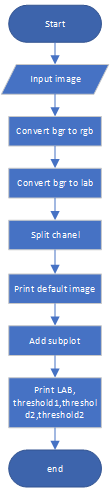

In [ ]:
import numpy as np
import os
import matplotlib.pyplot as plt
from skimage.feature import greycomatrix, greycoprops
from skimage.measure import label,regionprops
import pandas as pd
import cv2

sudut=[0,45,90,135]

featuresList=['contrast','dissimilarity', 'homogeneity','ASM','energy','correlation']
properties=np.zeros(25)
glcmatrix=[]
final=[]
abc=cv2.imread('/content/kopi.png')

gray_image= cv2.cvtColor(abc,cv2.COLOR_BGR2GRAY)

x=0

for ssd in sudut:
  print("SUDUT = ",ssd)
  glcmatrix=(greycomatrix(gray_image,distances=[2],angles=[ssd]))
  for j in range(0,len(featuresList)):
    properties[x]=(greycoprops(glcmatrix,featuresList[j]))
    print(featuresList[j],"->",properties[x])
    x=+1
    features = np.array([properties[0],properties[1],properties[2],
                          properties[3],properties[4],properties[5],
                          properties[6],properties[7],properties[8],
                          properties[9],properties[10],properties[11],
                          properties[12],properties[13],properties[14],
                          properties[15],properties[16],properties[17],
                          properties[18],properties[19],properties[20],
                          properties[21],properties[22],properties[23]])
    final.append(features)
    df=pd.DataFrame(final)




SUDUT =  0
contrast -> 501.8140415290563
dissimilarity -> 10.581398004356684
homogeneity -> 0.2939031201909542
ASM -> 0.003912502098976117
energy -> 0.06254999679437336
correlation -> 0.9572990575562056
SUDUT =  45
contrast -> 944.0227361022817
dissimilarity -> 16.75514763014763
homogeneity -> 0.21273619464638133
ASM -> 0.00406345512083438
energy -> 0.06374523606383758
correlation -> 0.9191455732117131
SUDUT =  90
contrast -> 950.3344017094017
dissimilarity -> 16.827161474888747
homogeneity -> 0.21136762024147585
ASM -> 0.004048102099499737
energy -> 0.06362469724485718
correlation -> 0.9186054572662729
SUDUT =  135
contrast -> 501.8140415290563
dissimilarity -> 10.581398004356684
homogeneity -> 0.2939031201909541
ASM -> 0.003912502098976117
energy -> 0.06254999679437336
correlation -> 0.9572990575562056


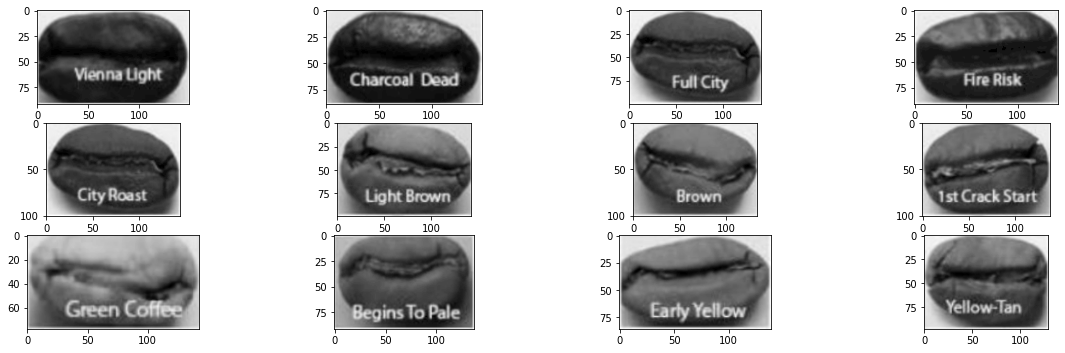

In [14]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/kopi.PNG',0)
ret,thresh=cv2.threshold(img,199,255,cv2.THRESH_BINARY)
contours,hierarchy = cv2.findContours(thresh,cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
#img=remove_background(img)

min_area =100*50
max_area =min_area *3

bounds=[]

for cont in contours:
  x,y,w,h = cv2.boundingRect(cont)
  area=w*h

  if area>min_area and area < max_area:
    bounds.append((x,y,w,h))

bounds=sorted(bounds,key=lambda bound:[1])
bounds=np.array_split(bounds,len(bounds)/4)
bounds=[sorted(bound, key=lambda bound:bound[0])for bound in bounds]
bounds=np.concatenate(bounds)

tiles = [img[y:y+h,x:x+w]for x,y,w,h in bounds]

fig = plt.figure(figsize=(20,10))

for i , tile in enumerate(tiles):
  fig.add_subplot(5,4,i+1)
  plt.imshow(tile,cmap='gray')


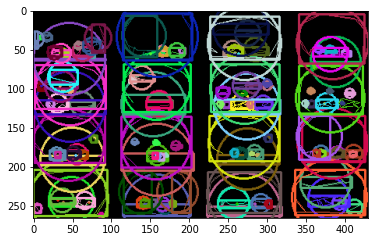

In [ ]:
from __future__ import print_function
import cv2 
import numpy as np
import argparse
import random as rng
import matplotlib.pyplot as plt

rng.seed(12345)
def thresh_callback(val):
    threshold = val
    
    canny_output = cv2.Canny(src_gray, threshold, threshold * 2)
    
    
    contours, _ = cv2.findContours(canny_output, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    
    
    contours_poly = [None]*len(contours)
    boundRect = [None]*len(contours)
    centers = [None]*len(contours)
    radius = [None]*len(contours)
    for i, c in enumerate(contours):
        contours_poly[i] = cv2.approxPolyDP(c, 3, True)
        boundRect[i] = cv2.boundingRect(contours_poly[i])
        centers[i], radius[i] = cv2.minEnclosingCircle(contours_poly[i])
    
    
    drawing = np.zeros((canny_output.shape[0], canny_output.shape[1], 3), dtype=np.uint8)
    
    
    for i in range(len(contours)):
        color = (rng.randint(0,256), rng.randint(0,256), rng.randint(0,256))
        cv2.drawContours(drawing, contours_poly, i, color)
        cv2.rectangle(drawing, (int(boundRect[i][0]), int(boundRect[i][1])), \
          (int(boundRect[i][0]+boundRect[i][2]), int(boundRect[i][1]+boundRect[i][3])), color, 2)
        cv2.circle(drawing, (int(centers[i][0]), int(centers[i][1])), int(radius[i]), color, 2)
    
    plt.imshow(drawing)
    
src = cv2.imread("kopi.png")
src_gray = cv2.cvtColor(src, cv2.COLOR_BGR2GRAY)
src_gray = cv2.blur(src_gray, (3,3))
thresh = 100 
thresh_callback(thresh)


coba coba tapi kurang paham sekedar eksperimental

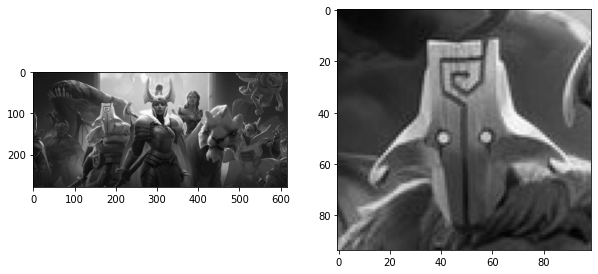

In [ ]:
from random import randrange
import matplotlib.pyplot as plt
import numpy as np
import cv2

figsize=(10,10)

img1=cv2.imread("/content/dota.jpg")
img2=cv2.imread("/content/dotac.jpg")

gray1=cv2.cvtColor(img1,cv2.COLOR_BGR2GRAY)
gray2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)

fig=plt.figure(figsize=figsize)
fig.add_subplot(2,2,1)
plt.imshow(gray1,cmap='gray')
fig.add_subplot(2,2,2)
plt.imshow(gray2,cmap='gray')

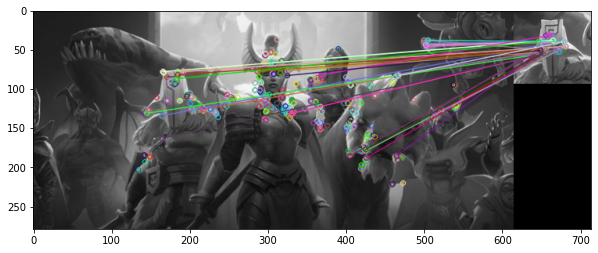

In [ ]:
orb = cv2.ORB_create()

kp= orb.detect(gray2,None)


queryKeypoints, queryDescriptors = orb.detectAndCompute(gray1,None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(gray2,None)
 

matcher = cv2.BFMatcher()
matches = matcher.match(queryDescriptors,trainDescriptors)
  

final_img = cv2.drawMatches(gray1, queryKeypoints,
gray2, trainKeypoints, matches[:30],None)
  

 
# Show the final image
plt.figure(figsize=figsize)
plt.imshow( final_img)


hasil metode  cv2.TM_CCOEFF :


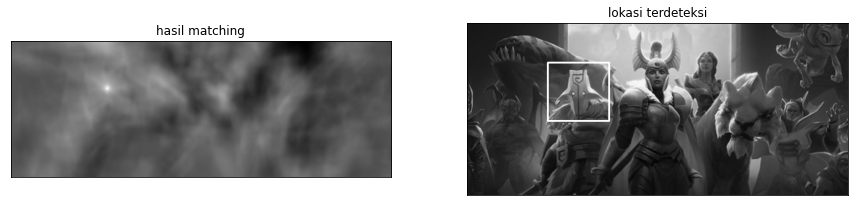

hasil metode  cv2.TM_CCOEFF_NORMED :


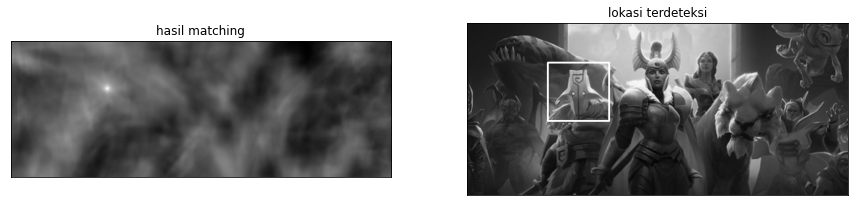

hasil metode  cv2.TM_CCORR :


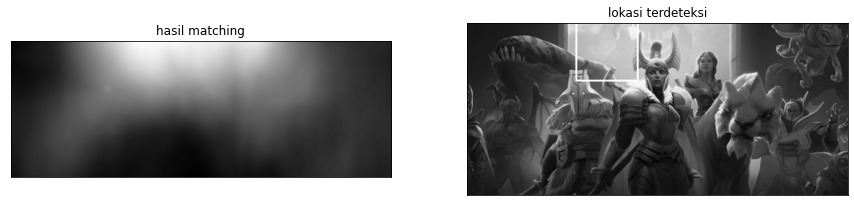

hasil metode  cv2.TM_CCORR_NORMED :


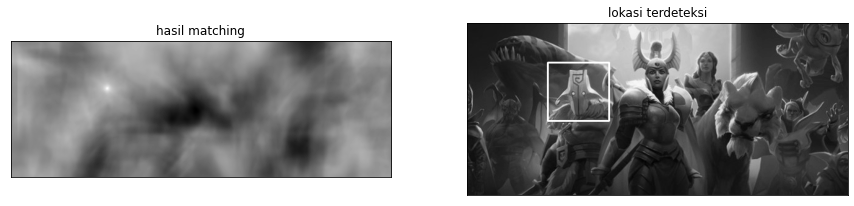

hasil metode  cv2.TM_SQDIFF :


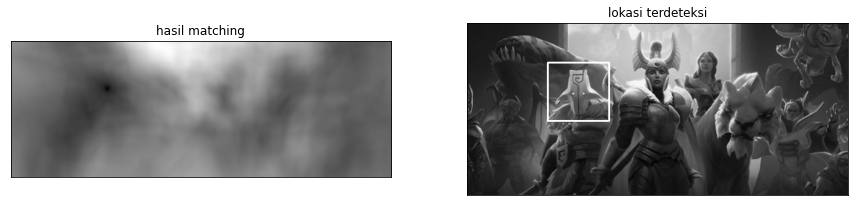

hasil metode  cv2.TM_SQDIFF_NORMED :


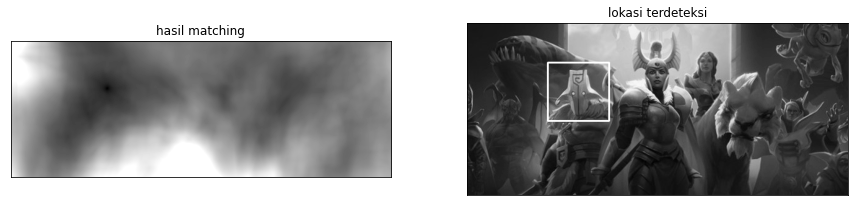

In [23]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img =cv2.imread("/content/dota.jpg",0)
img2=img.copy()
template=cv2.imread("/content/dotac.jpg",0)

w, h = template.shape[::-1]

method=['cv2.TM_CCOEFF','cv2.TM_CCOEFF_NORMED','cv2.TM_CCORR',
        'cv2.TM_CCORR_NORMED','cv2.TM_SQDIFF','cv2.TM_SQDIFF_NORMED']

plt.rcParams["figure.figsize"]=(15,15)

for met in method :
  img = img2.copy()
  method = eval(met)

  res = cv2.matchTemplate(img,template,method)
  min_val,max_val,min_loc,max_loc=cv2.minMaxLoc(res)
  if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
    top_left = min_loc
  else:
    top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)

  bottom_right = (top_left[0] + w, top_left[1] + h)
  cv2.rectangle(img,top_left, bottom_right, 255, 2)
  print("hasil metode ",met,":")
  plt.subplot(1,2,1) 
  plt.imshow(res,cmap='gray')
  plt.title('hasil matching'),plt.xticks([]),plt.yticks([])

  plt.subplot(1,2,2)
  plt.imshow(img,cmap='gray')
  plt.title('lokasi terdeteksi'),plt.xticks([]),plt.yticks([])
  plt.show()

  
  

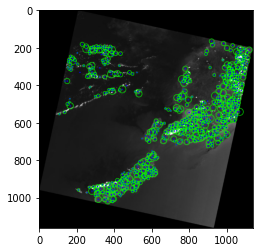

In [4]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('/content/LC08_L1TP_111067_20201119_20201210_01_T1_thumb_large.jpg',0)
img = cv2.medianBlur(img,5)
plt.imshow(img)
cimg = cv2.cvtColor(img,cv2.COLOR_GRAY2BGR)

circles = cv2.HoughCircles(img,cv2.HOUGH_GRADIENT,1,10,
                            param1=50,param2=12,minRadius=0,maxRadius=20)

circles = np.uint16(np.around(circles))
for i in circles[0,:]:
    # draw the outer circle
    cv2.circle(cimg,(i[0],i[1]),i[2],(0,255,0),2)
    # draw the center of the circle
    cv2.circle(cimg,(i[0],i[1]),2,(0,0,255),3)

plt.imshow(cimg)

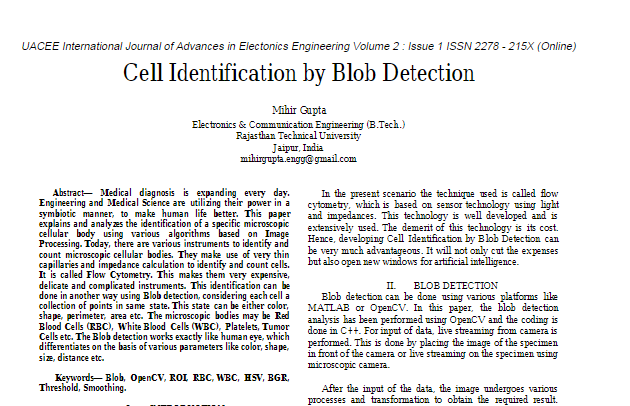

saya menggunakan pendeketan tersebut unutuk mendeteksi awan dengan blob detection